In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import math 
import idx2numpy
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# load the data 
train_x = idx2numpy.convert_from_file('./mnist/train-images-idx3-ubyte').astype(float)
train_y = idx2numpy.convert_from_file('./mnist/train-labels-idx1-ubyte').astype(float)
test_x = idx2numpy.convert_from_file('./mnist/t10k-images-idx3-ubyte').astype(float)
test_y = idx2numpy.convert_from_file('./mnist/t10k-labels-idx1-ubyte').astype(float)

In [3]:
# reshape all of the data. 
train_x_r = train_x.reshape((60000, 784))
train_x_r.shape

(60000, 784)

In [4]:
# get the sevens. 
sevens = []
for i in range(0, train_y.shape[0]): 
    if train_y[i] == 7: 
        sevens.append(train_x_r[i, :])

In [5]:
sevens = np.array(sevens)
sevens.shape

(6265, 784)

In [6]:
mu7 = tf.math.reduce_mean(sevens, 0)

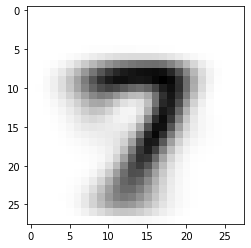

In [21]:
plt.imshow(mu7.numpy().reshape((28,28)), cmap='gray_r')
#plt.savefig("./figures/mu.pdf")

In [8]:
cov7 = tfp.stats.covariance(sevens, sevens, sample_axis=0)
e, v = tf.linalg.eigh(cov7)
v = tf.reverse(v, [1])
e = tf.reverse(e, [0])

In [9]:
v16 = v[:, 0:16]
v16.shape

TensorShape([784, 16])

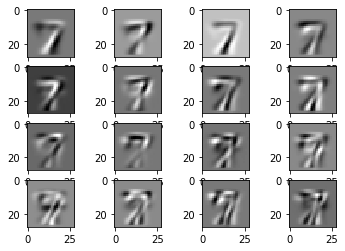

In [20]:
fig, axs = plt.subplots(4,4)
for i in range(0, 16): 
    axs[i // 4, i % 4].imshow(v16[:,i].numpy().reshape((28,28)), cmap='gray_r')
#fig.savefig("./figures/v16.pdf")   

In [11]:
e16 = e[0:16]
e_diag = tf.linalg.diag(e16)
cov = tf.matmul(v16, tf.matmul(e_diag, v16, transpose_b=True))
mvn = tfp.distributions.MultivariateNormalTriL(loc=mu7, scale_tril=np.linalg.cholesky(cov.numpy()+ np.identity(784) * 1e-6))
sample = mvn.sample([16])
sample.shape

TensorShape([16, 784])

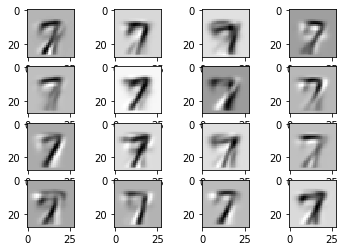

In [19]:
fig, axs = plt.subplots(4,4)
for i in range(0, 16): 
    axs[i // 4, i % 4].imshow(sample[i, :].numpy().reshape((28,28)), cmap='gray_r')
#fig.savefig("./figures/sample16.pdf") 

In [82]:
covb = np.fromfunction(lambda i, j: 0.5*((i/1000)+(j/1000)-abs((i/1000)-(j/1000))) - (i/1000)*(j/1000), shape=(1001, 1001))
covb

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  9.99000000e-04,  9.98000000e-04, ...,
         2.00000000e-06,  1.00000000e-06, -5.46437895e-17],
       [ 0.00000000e+00,  9.98000000e-04,  1.99600000e-03, ...,
         4.00000000e-06,  2.00000000e-06,  1.73472348e-18],
       ...,
       [ 0.00000000e+00,  2.00000000e-06,  4.00000000e-06, ...,
         1.99600000e-03,  9.98000000e-04,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e-06,  2.00000000e-06, ...,
         9.98000000e-04,  9.99000000e-04,  1.11022302e-16],
       [ 0.00000000e+00, -5.46437895e-17,  1.73472348e-18, ...,
         0.00000000e+00,  1.11022302e-16,  0.00000000e+00]])

In [97]:
mub = np.zeros(shape=(1001,))
#mub = np.array([3*float(i/1001) for i in range(0,1001)])

In [98]:
mvnb = tfp.distributions.MultivariateNormalTriL(loc=mub, scale_tril=np.linalg.cholesky(covb + np.identity(1001) * 1e-6))
sampleb = mvnb.sample([3])
sampleb.shape

TensorShape([3, 1001])

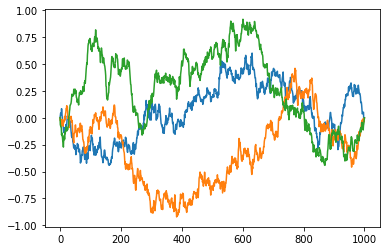

In [99]:
for i in range(0, 3):
    plt.plot(sampleb[i, :])

In [108]:
mub1 = np.array([3*float(i/1001) for i in range(0,1001)])
mvnb = tfp.distributions.MultivariateNormalTriL(loc=mub1, scale_tril=np.linalg.cholesky(covb + np.identity(1001) * 1e-6))
sampleb1 = mvnb.sample([3])
sampleb1.shape

TensorShape([3, 1001])

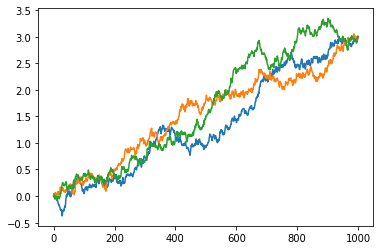

In [109]:
for i in range(0, 3):
    plt.plot(sampleb1[i, :])